# London Crime Statistics Financial Year 2022/23 Exploratory Data Analysis

This project will perform Exploratory Data Analysis **(EDA)** on MPS Crime Statistics Financial Year 2022/23.

The original dataset can be downloaded at the _[met.police.uk](https://data.london.gov.uk/dataset/mps-crime-statistics-financial-year-2022-23) website._

<br>


***
<br>

In 2018, the **Metropolitan Police Service** _**(MPS)**_ announced plans to replace its 32 borough model by condensing them into 12 **Basic Command Units** _**(BCUs)**_ to save £325m by 2021/22, or to put it in another fashion, due to police funding cuts. 

<br>

Here is a list of the 12 BCU merges:<br>

- Central West BCU *(AW)*: Hammersmith and Fulham, Kensington and Chelsea, Westminster<br>

- South West BCU *(SW)*: Kingston, Merton, Richmond, Wandsworth<br>
- South BCU *(SN)*: Bromley, Croydon, Sutton<br>
- South East BCU *(SE)*: Bexley, Greenwich, Lewisham<br>
- East BCU *(EA)*: Barking and Dagenham, Havering, Redbridge<br>
- West BCU *(WA)*: Ealing, Hillingdon, Hounslow<br>
- Central South BCU *(AS)*: Lambeth, Southwark<br>
- North BCU *(NA)*: Enfield, Haringey<br>
- Central East BCU *(CE)*: Hackney, Tower Hamlets<br>
- Central North BCU *(CN)*: Camden, Islington<br>
- North West BCU *(NW)*: Barnet, Brent, Harrow<br>
- North East BCU *(NE)*: Newham, Waltham Forest<br>

<br>

_For more information about the MET and its BCU changes, visit [bbc.co.uk](https://www.bbc.co.uk/news/uk-england-london-43033510#:~:text=The%20Metropolitan%20Police%20says%20it,of%20two%20or%20three%20boroughs.)_

 <br>

## Questions

1. What are the total number of investigated crimes in London per financial year? <br>

2. Which London boroughs and/or investigated the most number of crimes?
3. What are the most investigated types of criminal offences?
4. Has the distribution of different crime types changed over time?
5. What are the general trends in crime statistics from FY2022/23?

### Notebook Context

Section 1: Installing & Importing Necessary Libraries <br>
Section 2: Reading, Exploring and Prepping the Data <br>
Section 3: Exploratory Data Analysis and Data Visualisation <br>
**London Crime Statistics EDA Results Summary**


<br>

## Installing & Importing Necessary Libraries

In [2]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<br>

## Reading, Exploring and Prepping the Data

In [3]:
data = pd.read_csv("/Users/juanitanelson-addy/Documents/London-Crime-Stats-EDA/crimestats-2022-23.csv")

data.head()

,Month-Year,Type,Crime Section,Crime Group,BCU Name,OCU Name,Financial Year,DateUpTo,Count
0,2017-04-01,Offences,Miscellaneous Crimes Against Society,Other Forgery,Central North BCU,Islington,fy17-18,2023-03-01,3
1,2017-04-01,Sanction Detections,Miscellaneous Crimes Against Society,Perverting Course of Justice,Central West BCU,Hammersmith & Fulham,fy17-18,2023-03-01,3
2,2017-04-01,Sanction Detections,Arson and Criminal Damage,Arson,West BCU,Hillingdon,fy17-18,2023-03-01,1
3,2017-04-01,Offences,Theft,Shoplifting,West BCU,Ealing,fy17-18,2023-03-01,128
4,2017-04-01,Offences,Robbery,Robbery of Personal Property,South East BCU,Lewisham,fy17-18,2023-03-01,47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142756 entries, 0 to 142755
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Month-Year      142756 non-null  object
 1   Type            142756 non-null  object
 2   Crime Section   142756 non-null  object
 3   Crime Group     142756 non-null  object
 4   BCU Name        142756 non-null  object
 5   OCU Name        142756 non-null  object
 6   Financial Year  142756 non-null  object
 7   DateUpTo        142756 non-null  object
 8   Count           142756 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 9.8+ MB


In [5]:
#Check for any null values
pd.DataFrame(data.isnull().sum(), columns= ["Missing Values"])

,Missing Values
Month-Year,0
Type,0
Crime Section,0
Crime Group,0
BCU Name,0
OCU Name,0
Financial Year,0
DateUpTo,0
Count,0


Now that we have imported, explored and prepped the data, we can now start tackling our questions!




<br>

### What are the total number of investigated crimes in London per financial year?

In [6]:
#New DF for crimes per year
crime_stats_yrly = data.groupby("Financial Year")["Count"].sum().reset_index(name="Count").sort_values(by="Financial Year")
crime_stats_yrly.reset_index(drop=True)

,Financial Year,Count
0,fy17-18,928996
1,fy18-19,945918
2,fy19-20,990754
3,fy20-21,829270
4,fy21-22,904948
5,fy22-23,945477


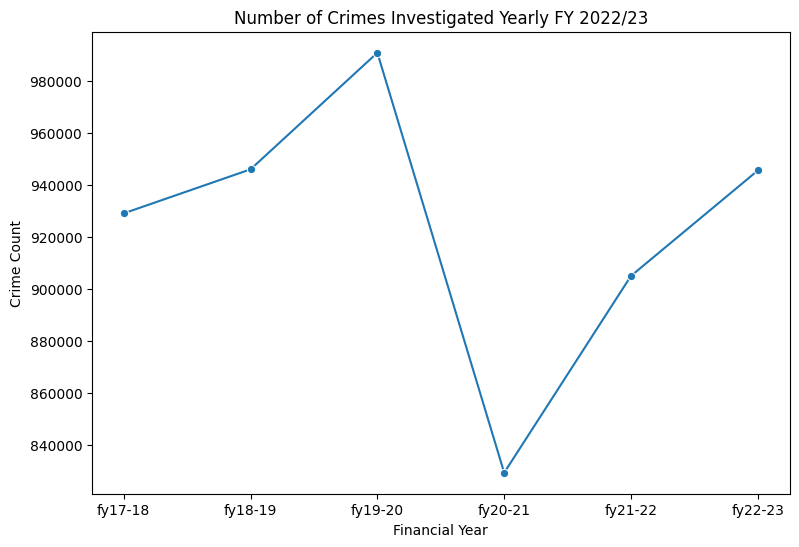

In [7]:
#Plotting new DF using Seaborn
plt.figure(figsize=(9,6))
sns.lineplot(data=crime_stats_yrly, x = "Financial Year", y = "Count", marker="o")

plt.title("Number of Crimes Investigated Yearly FY 2022/23")
plt.xlabel("Financial Year")
plt.ylabel("Crime Count")
plt.tight_layout
plt.show()


Findings: 

Crime rates were increasing between FY17-18 and FY19-20, however there was a noticeable drop in crimes investigated. This is most probably due to the COVID-19 pandemic. Since then, crime investigations have been on the rise again. The total number of crimes investigated in FY22-23 are just a few under FY18-19. Thus, the overall trend is that the number of crimes investigated increases per financial year. 

<br>

### Finding out which London boroughs have investigated the most crimes

Firstly, we will focus on the data that concerns the top 10 boroughs (OCUs), then look at the top 5 regional areas (BCUs) and discuss our findings.


In [8]:
# Counting no. of times a borough appears
top_boroughs = pd.Series(data["OCU Name"]).value_counts()
top_boroughs

OCU Name
Lambeth                 4913
Westminster             4889
Newham                  4876
Tower Hamlets           4819
Greenwich               4698
Croydon                 4685
Brent                   4653
Enfield                 4642
Hackney                 4637
Southwark               4620
Haringey                4584
Ealing                  4573
Islington               4572
Hounslow                4568
Wandsworth              4568
Lewisham                4546
Barnet                  4473
Camden                  4426
Waltham Forest          4400
Hammersmith & Fulham    4377
Hillingdon              4349
Redbridge               4316
Barking & Dagenham      4253
Bromley                 4189
Kensington & Chelsea    4103
Havering                4067
Harrow                  3939
Merton                  3934
Bexley                  3882
Sutton                  3716
Kingston upon Thames    3696
Richmond upon Thames    3506
Aviation Policing       2287
Name: count, dtype: int64

In [9]:
#Grabbing Top 10 boroughs
top_boroughs.head(10)

OCU Name
Lambeth          4913
Westminster      4889
Newham           4876
Tower Hamlets    4819
Greenwich        4698
Croydon          4685
Brent            4653
Enfield          4642
Hackney          4637
Southwark        4620
Name: count, dtype: int64

In [12]:
#New DF for borough counts
top_boroughs_counts = data["OCU Name"].value_counts().head(10)
top_boroughs_df = top_boroughs_counts.reset_index()
top_boroughs_df.columns = ["OCU Name", "Count"]
top_boroughs_df

,OCU Name,Count
0,Lambeth,4913
1,Westminster,4889
2,Newham,4876
3,Tower Hamlets,4819
4,Greenwich,4698
5,Croydon,4685
6,Brent,4653
7,Enfield,4642
8,Hackney,4637
9,Southwark,4620


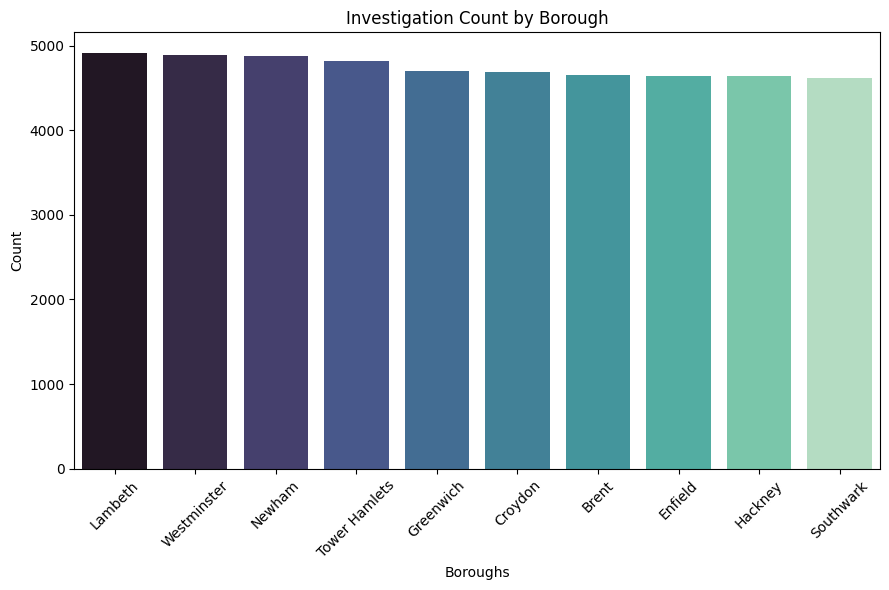

In [13]:
#Visualise top borough data using Seaborn
plt.figure(figsize=(9,6))
sns.barplot(data=top_boroughs_df, x = "OCU Name", y = "Count", hue = "OCU Name", palette="mako", dodge=False, legend=False)

plt.title("Investigation Count by Borough")
plt.xlabel("Boroughs")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='center')

plt.tight_layout()
plt.show()

In [14]:
#Is there a trend in which areas of London have the most crimes reported?
top_areas = pd.Series(data["BCU Name"]).value_counts()
top_areas

BCU Name
South West BCU           15704
West BCU                 13490
Central West BCU         13369
South East BCU           13126
North West BCU           13065
East BCU                 12636
South BCU                12590
Central South BCU         9533
Central East BCU          9456
North East BCU            9276
North BCU                 9226
Central North BCU         8998
Aviation Policing BCU     2287
Name: count, dtype: int64

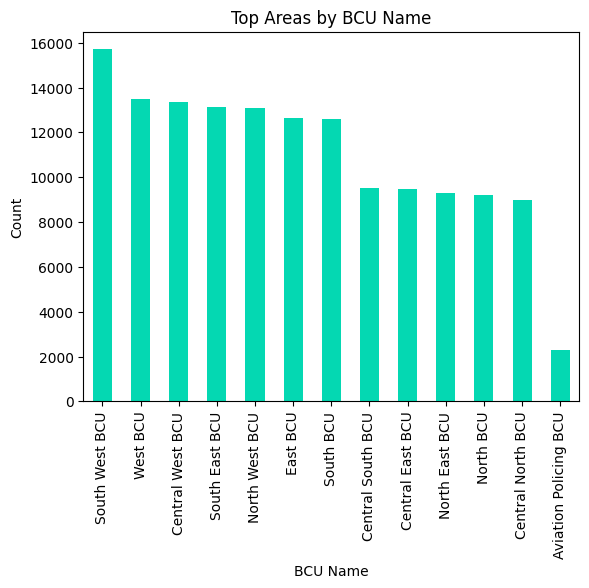

In [15]:
#Matplotlib graph of all BCUs counts
graph = top_areas.plot(kind="bar", color="#04D8B2")

graph.set_title("Top Areas by BCU Name")  
graph.set_xlabel("BCU Name")        
graph.set_ylabel("Count")

plt.show()


In [16]:
top_areas.head()

BCU Name
South West BCU      15704
West BCU            13490
Central West BCU    13369
South East BCU      13126
North West BCU      13065
Name: count, dtype: int64

In [17]:
#New DF for borough counts
top_areas_counts = data["BCU Name"].value_counts().head()
top_areas_df = top_areas_counts.reset_index()
top_areas_df.columns = ["BCU Name", "Count"]
top_areas_df

,BCU Name,Count
0,South West BCU,15704
1,West BCU,13490
2,Central West BCU,13369
3,South East BCU,13126
4,North West BCU,13065


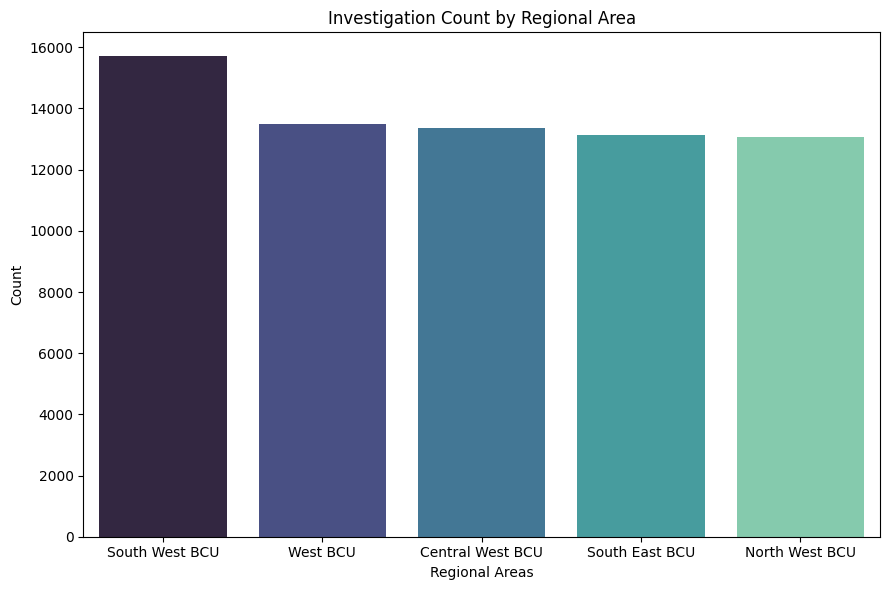

In [18]:
plt.figure(figsize=(9,6))
sns.barplot(data=top_areas_df, x = "BCU Name", y = "Count", hue = "BCU Name", palette="mako", dodge=False, legend=False)

plt.title("Investigation Count by Regional Area")
plt.xlabel("Regional Areas")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


Findings:

The OCU (or borough) that has investigated the most crimes is Lambeth *(4913)*. The BCU (or regional area) that has investigated the most crimes is the South West BCU *(15704)*. As listed before, Lambeth is part of the Central South BCU, whilst the South West BCU consists of Kingston, Merton, Richmond and Wandsworth.

Westminster and Newham are not far behind Lambeth *(4889 and 4876 respectively)*. The West and Central West BCUs are not far behind from first place *(13490 and 13369 respectively)*.

The higher investigation counts could be down to various factors such as higher population densities, commercial activity (e.g. tourism), resource allocation, or even poor effectiveness of reporting and investigation mechanisms.

Further investigations into the underlying causes of crimes in different boroughs and regional areas is essential to better understand and tackle the crime rates.


<br>

### What are the most investigated types of criminal offences?

In [19]:
crime_section_counts = pd.Series(data["Crime Section"]).value_counts()
crime_section_counts

Crime Section
Miscellaneous Crimes Against Society    31888
Theft                                   15934
Possession of Weapons                   14322
Public Order Offences                   14247
Vehicle Offences                        14045
Violence Against the Person             10691
Drug Offences                            9269
Burglary                                 8904
Sexual Offences                          8050
Robbery                                  7791
Arson and Criminal Damage                7607
Historical Fraud and Forgery                8
Name: count, dtype: int64

In [20]:
crime_group_counts = pd.Series(data["Crime Group"]).value_counts()
crime_group_counts

Crime Group
Violence without Injury                               4749
Possession of Drugs                                   4740
Violence with Injury                                  4733
Shoplifting                                           4721
Criminal Damage                                       4720
Public Fear Alarm or Distress                         4644
Other Offences Against the State or Public Order      4644
Possession of Article with Blade or Point             4566
Drug Trafficking                                      4529
Possession of Other Weapon                            4526
Other Theft                                           4500
Other Sexual Offences                                 4469
Domestic Burglary                                     4467
Racially or Religiously Aggravated Public Fear Al     4467
Burglary Business and Community                       4437
Robbery of Personal Property                          4398
Theft or Taking of a Motor Vehicle          

In [21]:
crime_group_counts.head(10)

Crime Group
Violence without Injury                             4749
Possession of Drugs                                 4740
Violence with Injury                                4733
Shoplifting                                         4721
Criminal Damage                                     4720
Public Fear Alarm or Distress                       4644
Other Offences Against the State or Public Order    4644
Possession of Article with Blade or Point           4566
Drug Trafficking                                    4529
Possession of Other Weapon                          4526
Name: count, dtype: int64

In [22]:
#Creating new DFs for the crime section & group

crime_section_df = crime_section_counts.reset_index()
crime_section_df.columns = ["Crime Section", "Count"]
crime_section_df

,Crime Section,Count
0,Miscellaneous Crimes Against Society,31888
1,Theft,15934
2,Possession of Weapons,14322
3,Public Order Offences,14247
4,Vehicle Offences,14045
5,Violence Against the Person,10691
6,Drug Offences,9269
7,Burglary,8904
8,Sexual Offences,8050
9,Robbery,7791


In [23]:
crime_group_df = crime_group_counts.reset_index()
crime_group_df.columns = ["Crime Group", "Count"]
crime_group_df.head(10)

,Crime Group,Count
0,Violence without Injury,4749
1,Possession of Drugs,4740
2,Violence with Injury,4733
3,Shoplifting,4721
4,Criminal Damage,4720
5,Public Fear Alarm or Distress,4644
6,Other Offences Against the State or Public Order,4644
7,Possession of Article with Blade or Point,4566
8,Drug Trafficking,4529
9,Possession of Other Weapon,4526


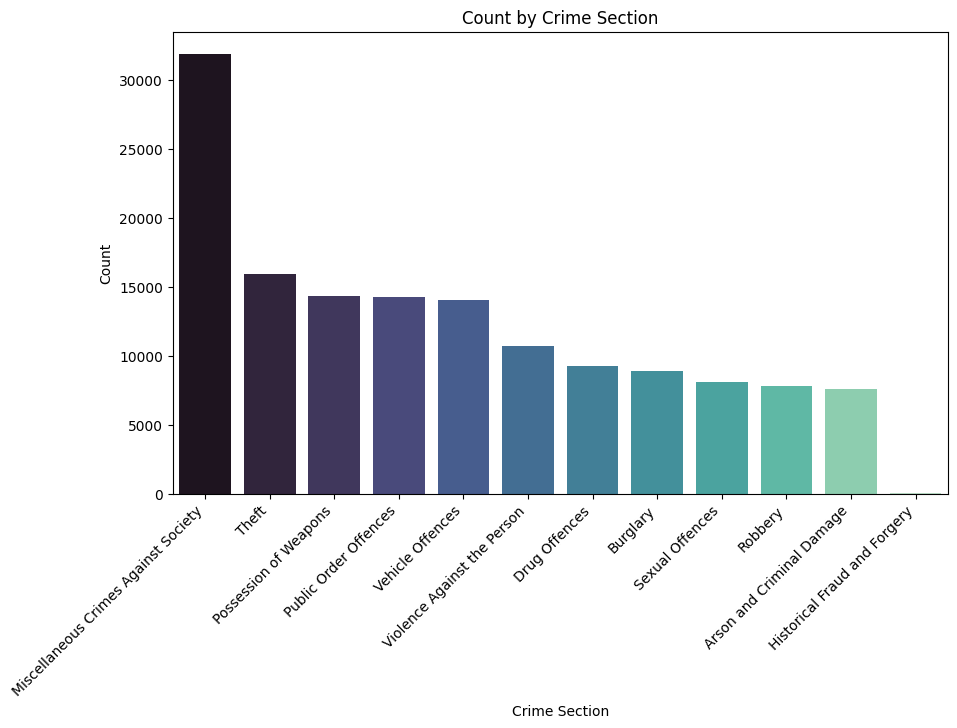

In [24]:
#Plotting the DataFrames

plt.figure(figsize=(10,6))
sns.barplot(data=crime_section_df, x = "Crime Section", y="Count", palette="mako", hue="Crime Section", dodge=False, legend=False)

plt.title("Count by Crime Section")
plt.xlabel("Crime Section")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")

plt.show()

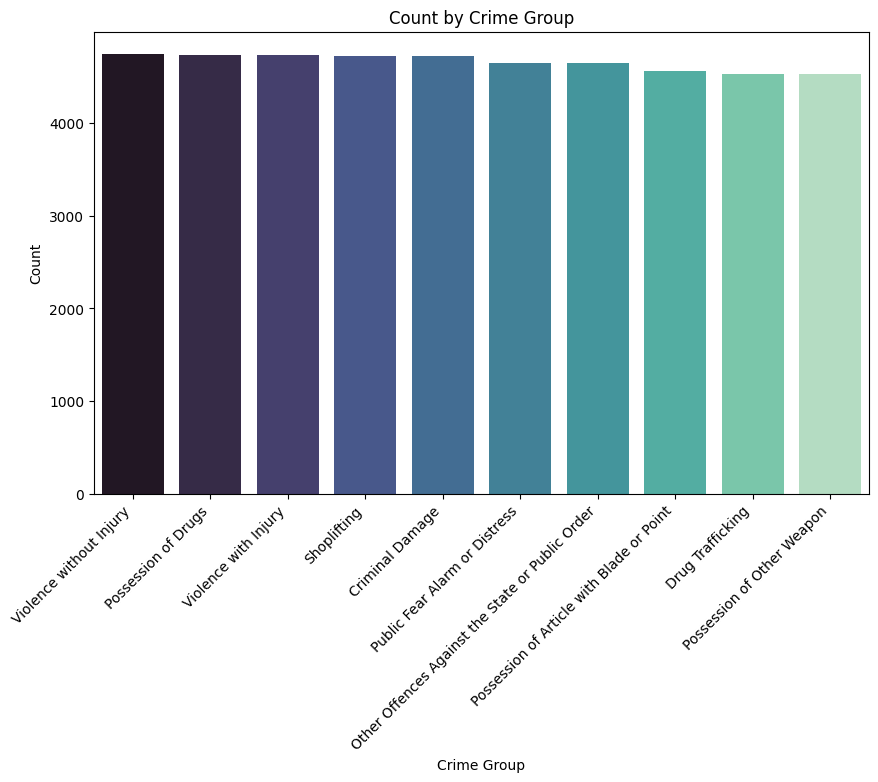

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=crime_group_df.head(10), x = "Crime Group", y="Count", palette="mako", hue="Crime Group", dodge=False, legend=False)

plt.title("Count by Crime Group")
plt.xlabel("Crime Group")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")

plt.show()

Findings:

By Crime Section, Miscellanious Crimes Against Society comes out on top by a large margin. Theft, Possessions of Weapons, Public Order Offences and Driving Offences all follow approxiately 15,000 below number one.

Violence Without Injury is the top Crime Group, however, Possession of Drugs, Violence with Injury, Shoplifting and Criminal Damage are not far behind. 


<br>

### Has the distribution of crime types changed over time?

                  Crime Section Financial Year   Count
0     Arson and Criminal Damage        fy17-18   65824
1     Arson and Criminal Damage        fy18-19   61452
2     Arson and Criminal Damage        fy19-20   59418
3     Arson and Criminal Damage        fy20-21   53922
4     Arson and Criminal Damage        fy21-22   57786
..                          ...            ...     ...
65  Violence Against the Person        fy18-19  241774
66  Violence Against the Person        fy19-20  244004
67  Violence Against the Person        fy20-21  242276
68  Violence Against the Person        fy21-22  262523
69  Violence Against the Person        fy22-23  260901

[70 rows x 3 columns]


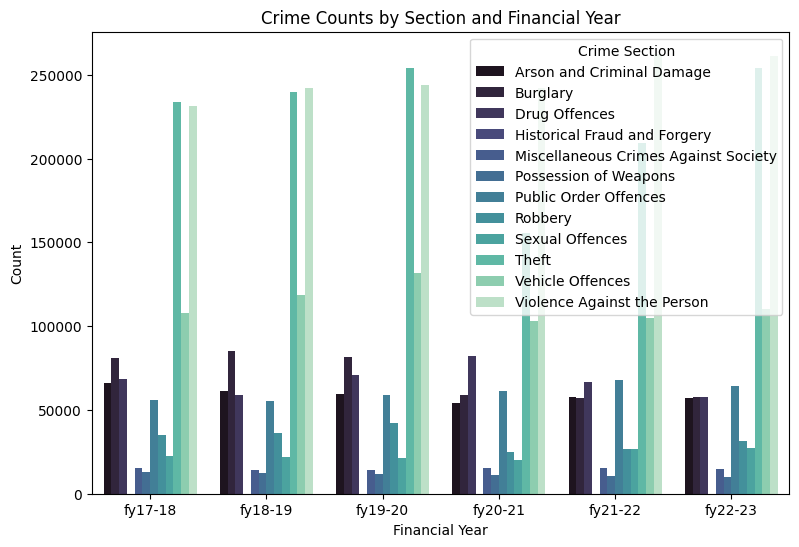

In [26]:
#Creating a dataframe for crime group, financial year & count

financial_yr_crimes_df = data.groupby(["Crime Section", "Financial Year"])["Count"].sum().reset_index()
print(financial_yr_crimes_df)

plt.figure(figsize=(9,6))
sns.barplot(data=financial_yr_crimes_df, x="Financial Year", y="Count", hue="Crime Section", palette="mako")
plt.title("Crime Counts by Section and Financial Year")
plt.show()

/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_8861/1012554845.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_fy_df = filtered_fy_df.groupby("Financial Year").apply(lambda x: x.nlargest(5, "Count")).reset_index(drop=True)


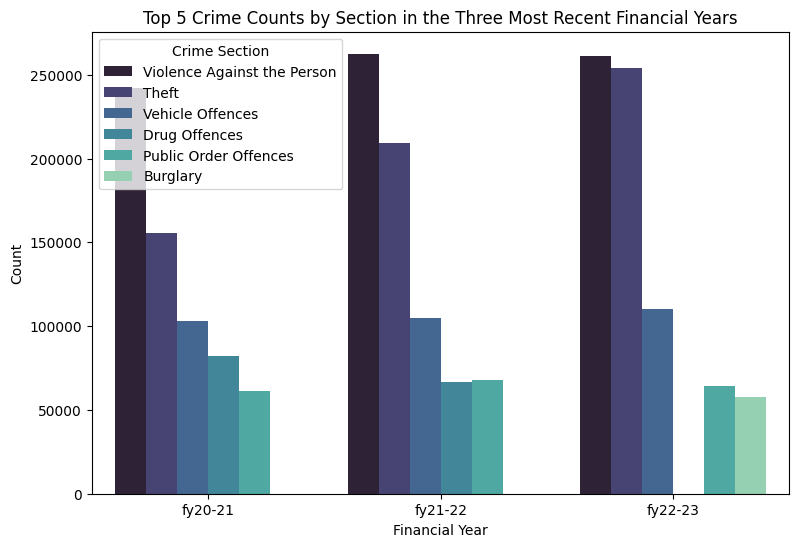

In [27]:
#Create a more refined barchart that looks at the last 3 financial years & the top 5 crime groups

#Filter DF to only include the three most recent financial years
recent_years = financial_yr_crimes_df["Financial Year"].unique()[-3:]

#Filter DF for those three years
filtered_fy_df = financial_yr_crimes_df[financial_yr_crimes_df['Financial Year'].isin(recent_years)]

#Sort the filtered DF by count in descending order
sorted_fy_df = filtered_fy_df.groupby("Financial Year").apply(lambda x: x.nlargest(5, "Count")).reset_index(drop=True)

#Plot the chart
plt.figure(figsize=(9,6))
sns.barplot(data=sorted_fy_df, x="Financial Year", y="Count", hue="Crime Section", palette="mako")
plt.title("Top 5 Crime Counts by Section in the Three Most Recent Financial Years")
plt.show()

In [29]:
#Calculate total crime investigated per borough
total_borough_crimes = data.groupby("OCU Name")["Count"].sum().reset_index()

#Idenitfy top 3 boroughs
top_3_boroughs = total_borough_crimes.nlargest(3, "Count")["OCU Name"]

#Filter OG dataset to only include the top 3 boroughs
filtered_data_top3 = data[data["OCU Name"].isin(top_3_boroughs)]

#Group by crime section, ocu name & count
crime_section_borough_df = filtered_data_top3.groupby(["Crime Section", "OCU Name"])["Count"].sum().reset_index()

#Work out top 5 crime sections within top 3 boroughs
sorted_csb_df = crime_section_borough_df.groupby("OCU Name").apply(lambda x: x.nlargest(5, "Count")).reset_index(drop=True)

#Display DF
sorted_csb_df


/var/folders/hh/xj5f9jp9389043d0n5sb2q440000gn/T/ipykernel_8861/2137994114.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_csb_df = crime_section_borough_df.groupby("OCU Name").apply(lambda x: x.nlargest(5, "Count")).reset_index(drop=True)


,Crime Section,OCU Name,Count
0,Violence Against the Person,Newham,62894
1,Theft,Newham,56681
2,Vehicle Offences,Newham,28096
3,Drug Offences,Newham,24105
4,Arson and Criminal Damage,Newham,14249
5,Theft,Southwark,65247
6,Violence Against the Person,Southwark,56552
7,Vehicle Offences,Southwark,19910
8,Drug Offences,Southwark,19449
9,Burglary,Southwark,17768


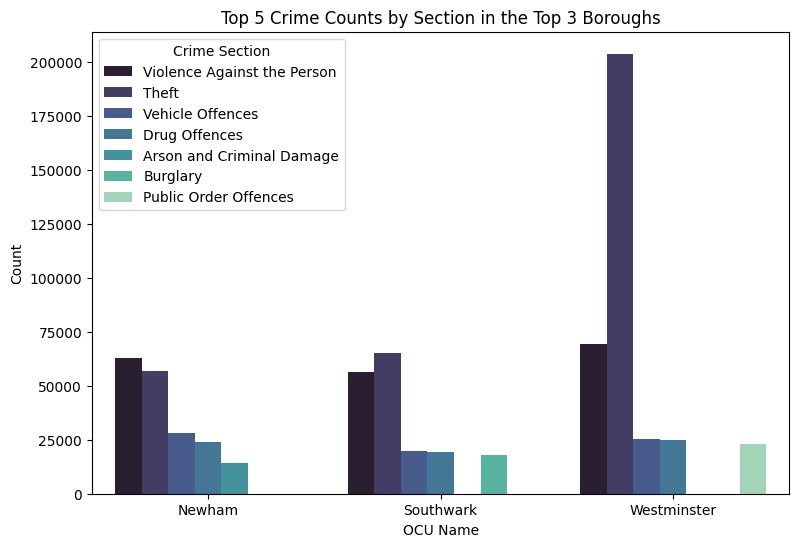

In [30]:
#Create barchart

plt.figure(figsize=(9,6))
sns.barplot(data=sorted_csb_df, x="OCU Name", y="Count", hue="Crime Section", palette="mako")
plt.title("Top 5 Crime Counts by Section in the Top 3 Boroughs")

plt.show()

Findings:

Westminster crime counts dominate by a large margin in comparison to Newham and Southwark, particularly in Violence Against the Person which exceeds 200,000 incidents. This indicates Westminster as a major hotspot for criminal activity, likely due to its central and densely populated nature. Other crime sections, such as Vehicle Offences, Drug Offences, and Public Order Offences, are more evenly distributed but remain significantly lower than Violence and Theft.

Violence Against the Person consistently leads across all three boroughs. Newham and Southwark show more balanced crime distributions, with Theft and Violence Against the Person being prominent but less extreme compared to Westminster. The disparity between the borough crime counts suggests that factors like socioeconomic conditions, population density and urban activity may play significant roles.

In [31]:
# Grouped bar chart comparing 21-22 & 22-23 Top 3 Crime Groups

# Filter data for "Offences" and relevant financial years
offences_data = data[(data["Type"] == "Offences") & 
                           (data["Financial Year"].isin(["fy21-22", "fy22-23"]))]

# Identify the top 3 crime groups for "fy22-23" based on total count
top_crimes = (offences_data[offences_data["Financial Year"] == "fy22-23"]
              .groupby("Crime Group")["Count"]
              .sum()
              .nlargest(3)
              .index)

# Filter for only the top 3 crime groups
filtered_data = offences_data[offences_data["Crime Group"].isin(top_crimes)]

# Grouped bar chart data preparation
grouped_data = (filtered_data.groupby(["Financial Year", "Crime Group"])["Count"]
                .sum()
                .reset_index())

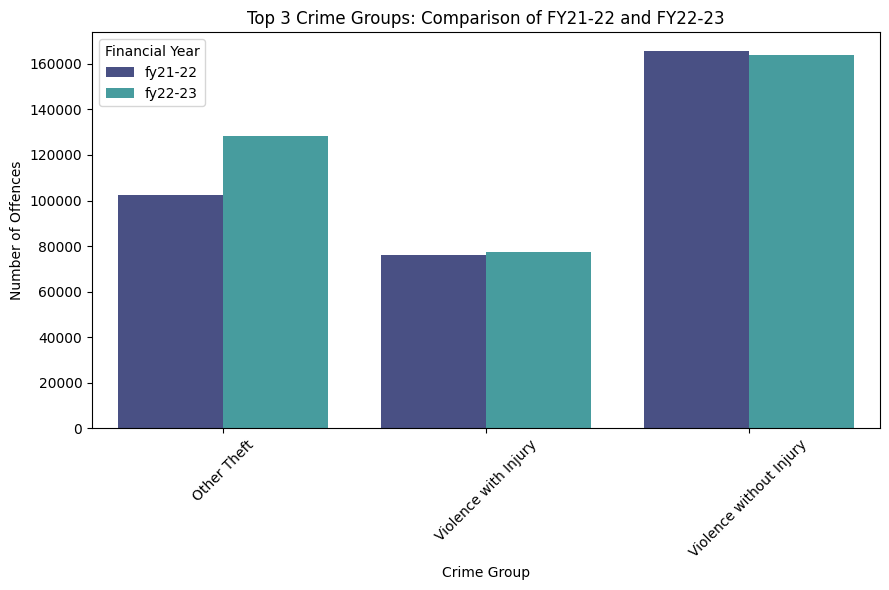

In [32]:
# Create the bar chart plot

plt.figure(figsize=(9,6))
sns.barplot(data=grouped_data, x="Crime Group", y="Count", hue="Financial Year", palette="mako")
plt.title("Top 3 Crime Groups: Comparison of FY21-22 and FY22-23")
plt.ylabel("Number of Offences")
plt.xlabel("Crime Group")
plt.legend(title="Financial Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Findings:

Violence Without Injury stands out as the top crime group across both years, showing consistent high rates. Theft and Shoplifting follow as the second and third highest crime groups, although they exhibit some fluctuation between the two years.

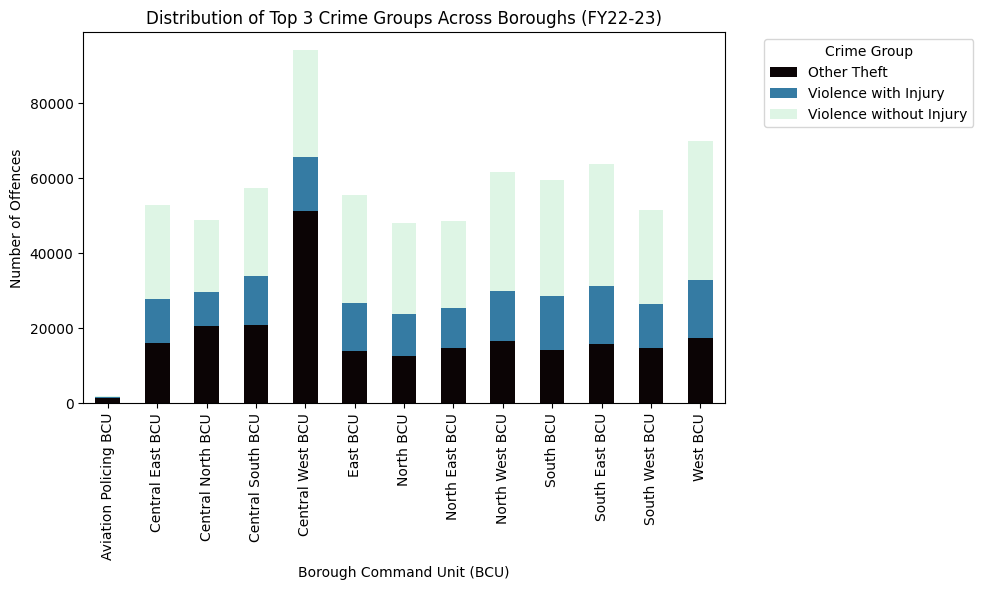

In [35]:
# Stacked bar chart by borough (BCU Name) and crime group

stacked_data = (filtered_data.groupby(["BCU Name", "Crime Group"])["Count"]
                .sum()
                .unstack(fill_value=0))

# Plotting the stacked bar chart
stacked_data.plot(kind="bar", stacked=True, figsize=(10,6), colormap="mako")
plt.title("Distribution of Top 3 Crime Groups Across Boroughs (FY22-23)")
plt.ylabel("Number of Offences")
plt.xlabel("Borough Command Unit (BCU)")
plt.legend(title="Crime Group", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Findings:

Some boroughs report significantly higher numbers of crimes compared to others, indicating hotspots for certain activities. Boroughs such as Central West and West BCU report consistently high counts across multiple crime groups which suggests crime activity is concentrated in densely populated areas.

In most boroughs, Violence Without Injury dominates as the most common crime group, followed by Theft or Shoplifting, aligning with trends seen in the grouped bar chart. These findings highlight the need for borough-specific interventions to address dominant crime groups. For example, perhaps, more community outreach programs targeting shoplifting, such as engaging with retailers or providing support to vulnerable groups. Additionally, creating more awareness campaigns addressing harrassment and interpersonal violence to reduce incidents categorised under Violence Without Injury.

<br>

# London Crime Statistics EDA Results Summary

#### **Question 1: What are the total number of investigated crimes in London per financial year?**

- FY17-18 *(928996)*

- FY18-19 *(945918)*

- FY19-20 *(990754)*

- FY20-21 *(829270)*

- FY21-22 *(904948)*

- FY22-23 *(945477)*

<br>

##### **Question 2: Which London boroughs and/or areas investigated the most number of crimes?**
BOROUGHS

- Lambeth *(4913)*

- Westminster *(4889)*

- Newham *(4876)*

- Tower Hamlets *(4819)*

- Greenwich *(4698)*

- Croydon *(4685)*

- Brent *(4653)*

- Enfield *(4642)*

- Hackney *(4637)*

- Southwark *(4620)*

<br>

AREAS

- South West BCU *(15704)*

- West BCU *(13490)*

- Central West BCU *(13369)*

- South East BCU *(13126)*

- North West BCU *(13065)*

<br>


#### **Question 3: What are the most investigated types of criminal offences?**


BY CRIME SECTION

- Miscellaneous Crimes Against Society *(31888)*

- Theft *(15934)*

- Possession of Weapons	*(14322)*

- Public Order Offences	*(14247)*

- Vehicle Offences *(14045)*

- Violence Against the Person *(10691)*


<br>

BY CRIME GROUP

- Violence without Injury *(4749)*

- Possession of Drugs *(4740)*

- Violence with Injury *(4733)*

- Shoplifting *(4721)*

- Criminal Damage *(4720)*

- Public Fear Alarm or Distress *(4644)*

- Other Offences Against the State or Public Order *(4644)*

- Possession of Article with Blade or Point *(4566)*

- Drug Trafficking *(4529)*

- Possession of Other Weapon *(4526)*

<br>

#### **Question 4: Has the distribution of different crime types changed over time?**






#### **Question 5: What are the general trends in crime statistics from FY2022/23?**
